# Objectives:
- [x] Control the PyBench board from your PC running Matlab.
- [x] Generate and capture real electrical signals using PyBench.
- [x] Analyse spectrum of sound signals captured from the microphone/amplifier.
- [x] Examine the effect of aliasing effect due to under sampling.
- [x] Frequency resolution on the spectrum computed using FFT.
- [x] Understand the impact of using different types of windows on signals.
- [x] Analyse sound signal stored as a .WAV file on a computer.
- [x] Perform signal segmentation using energy of signal.
- [x] Analyse the spectrum of actual musical sound.

## Task 1: Connecting the PyBench board to your PC or Macbook running Matlab
Notes:
1. the new USB port does not appear as'MYBENCH_MK2', it just appears as 'USB Serial Device (COM 8)' on device manager.
2. Mic and accelerometer working fine.
3. ADC/DAC test - did not have to do anything to the short-circuit jumper to control the frequency of the sinewave.
4. Path to Lab 2 folder in LogBook folder successfully created in MATLAB t access the PyBench OS.

## Task 2: Using PyBench to generate signals via MATLAB and explore their spectra

The following methods can be used to control the PyBench system
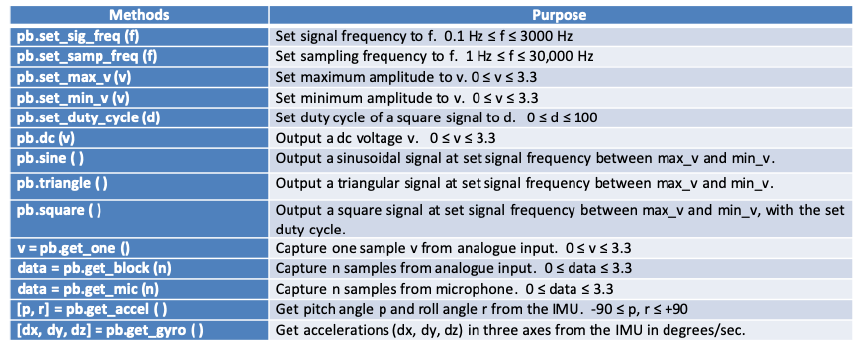

### Generate Signals

In [20]:
%%file lab2task2_sine.m

clear all
ports = serialportlist;
pb = PyBench(ports(end));

% Set the various parameters
f = 440;
fs = 8000;
pb = pb.set_sig_freq(f);
pb = pb.set_samp_freq(fs);
pb = pb.set_max_v(3.0);
pb = pb.set_min_v(0.5);
pb =pb.set_duty_cycle(50);

% generate a sinusoidal signal between max_v and min_v
pb.sine();

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task2_sine.m'.


In [21]:
lab2task2_sine

The lab2task2_sine script with f set to 440 and fs set to 8000 generates the following sine wave: <br></br>
<img src="440hzsinewave.jpg" alt="generated sine wave" width="50%" align= "middle"/>

In [26]:
%%file lab2task2_triangle.m

clear all
ports = serialportlist;
pb = PyBench(ports(end));

% Set the various parameters
f = 440;
fs = 8000;
pb = pb.set_sig_freq(f);
pb = pb.set_samp_freq(fs);
pb = pb.set_max_v(3.0);
pb = pb.set_min_v(0.5);
pb =pb.set_duty_cycle(50);

% generate a triangle signal between max_v and min_v
pb.triangle();

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task2_triangle.m'.


In [23]:
lab2task2_triangle

<img src="trianglewave.jpg" alt="generated triangle wave" width="50%" align= "middle"/>

In [24]:
%%file lab2task2_square.m

clear all
ports = serialportlist;
pb = PyBench(ports(end));

% Set the various parameters
f = 440;
fs = 8000;
pb = pb.set_sig_freq(f);
pb = pb.set_samp_freq(fs);
pb = pb.set_max_v(3.0);
pb = pb.set_min_v(0.5);
pb =pb.set_duty_cycle(50);

% generate a square signal between max_v and min_v
pb.square();

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task2_square.m'.


In [25]:
lab2task2_square

<img src="squarewave.jpg" alt="generated square wave" width="50%" align= "middle"/>

### Capture generated sinusoidal signals

In [1]:
%%file lab2task2_capsine.m
clear all
ports = serialportlist;
pb = PyBench(ports(end));

% Set the various parameters
f = 440;
fs = 8000;
pb = pb.set_sig_freq(f);
pb = pb.set_samp_freq(fs);
pb = pb.set_max_v(3.0);
pb = pb.set_min_v(0.5);
pb =pb.set_duty_cycle(50);

% generate a sinusoidal signal between max_v and min_v
pb.sine();

% Capture N samples
N = 1000;
samples = pb.get_block(N);     % get a block of N samples
data = samples - mean(samples); % remove the DC offset

% plot data
figure(1);
plot(data(1:200),'o');
hold on
plot(data(1:200));
xlabel('Sample no');
ylabel('Signal voltage (V)');
title('Captured signal');
hold off

%find spectrum
figure(2);
plot_spec(data,fs);

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task2_capsine.m'.


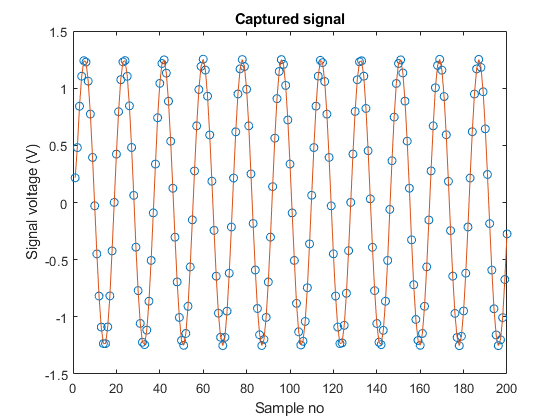

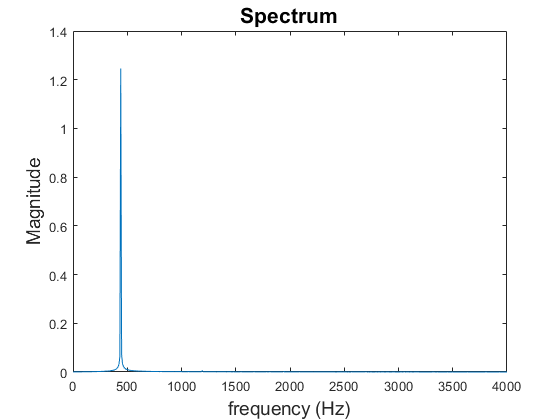

In [31]:
lab2task2_capsine

In [32]:
%%file lab2task2_captriangle.m
clear all
ports = serialportlist;
pb = PyBench(ports(end));

% Set the various parameters
f = 440;
fs = 8000;
pb = pb.set_sig_freq(f);
pb = pb.set_samp_freq(fs);
pb = pb.set_max_v(3.0);
pb = pb.set_min_v(0.5);
pb =pb.set_duty_cycle(50);

% generate a sinusoidal signal between max_v and min_v
pb.triangle();

% Capture N samples
N = 1000;
samples = pb.get_block(N);
data = samples - mean(samples);

% plot data
figure(1);
plot(data(1:200),'o');
hold on
plot(data(1:200));
xlabel('Sample no');
ylabel('Signal voltage (V)');
title('Captured signal');
hold off

%find spectrum
figure(2);
plot_spec(data,fs);

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task2_captriangle.m'.


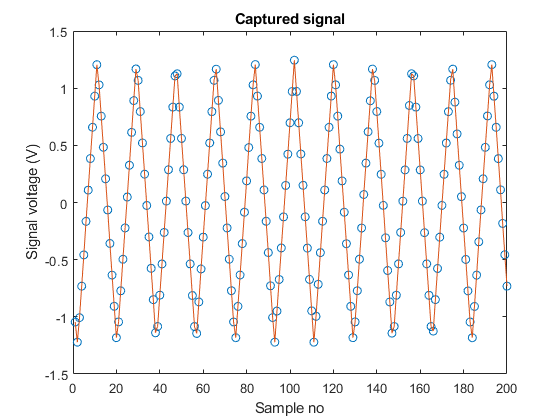

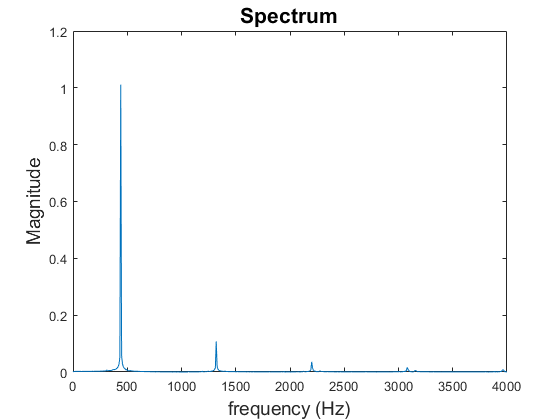

In [33]:
lab2task2_captriangle

In [34]:
%%file lab2task2_capsquare.m
clear all
ports = serialportlist;
pb = PyBench(ports(end));

% Set the various parameters
f = 440;
fs = 8000;
pb = pb.set_sig_freq(f);
pb = pb.set_samp_freq(fs);
pb = pb.set_max_v(3.0);
pb = pb.set_min_v(0.5);
pb =pb.set_duty_cycle(50);

% generate a sinusoidal signal between max_v and min_v
pb.square();

% Capture N samples
N = 1000;
samples = pb.get_block(N);
data = samples - mean(samples);

% plot data
figure(1);
plot(data(1:200),'o');
hold on
plot(data(1:200));
xlabel('Sample no');
ylabel('Signal voltage (V)');
title('Captured signal');
hold off

%find spectrum
figure(2);
plot_spec(data,fs);

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task2_capsquare.m'.


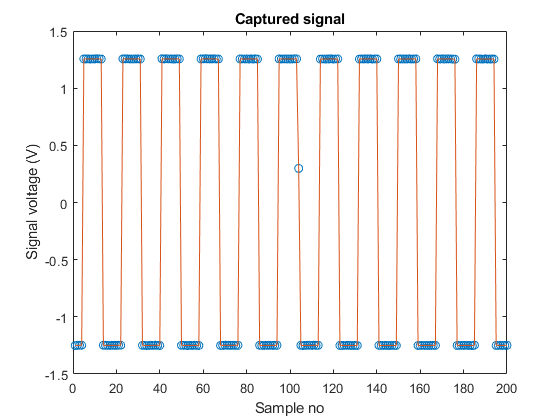

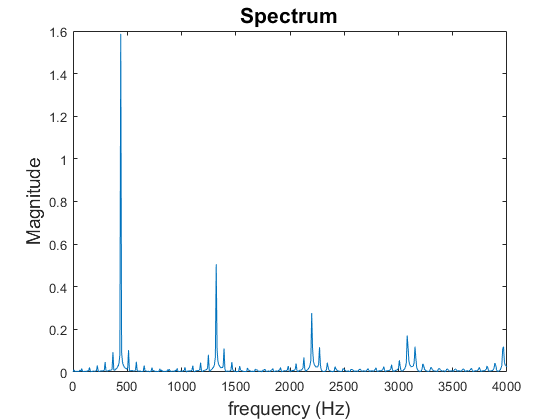

In [35]:
lab2task2_capsquare

## Task 3: Capture and analyse microphone signals

In [36]:
%%file lab2task3.m
clear all;
ports = serialportlist;
pb = PyBench(ports(end));

% set sampling frequency
fs = 8000;
pb = pb.set_samp_freq(fs);

% Capture N samples
N = 1000;
samples = pb.get_mic(N);
data = samples - mean(samples); % remove DC offset

% plot data
figure(1);
clf
plot(data);
xlabel('Sample no');
ylabel('Signal Voltage (V)');
title('Microphone signal');

%find and plot the spectrum;
figure(2);
plot_spec(data, fs)

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task3.m'.


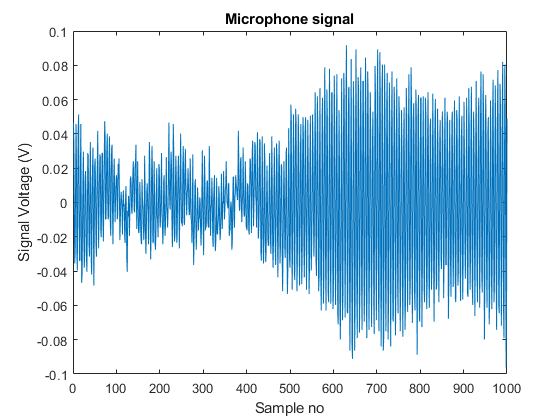

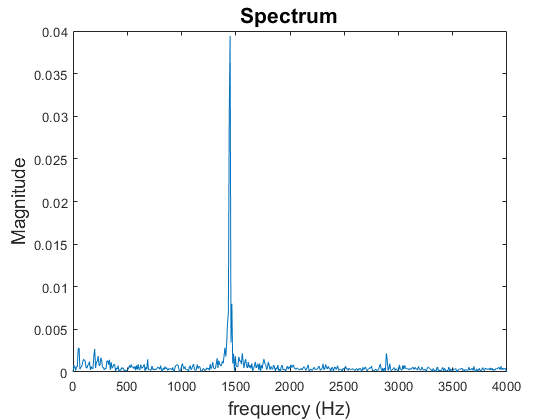

In [37]:
lab2task3

In [40]:
%%file lab2task3a.m
clear all;
ports = serialportlist;
pb = PyBench(ports(end));

% set sampling frequency
fs = 8000;
pb = pb.set_samp_freq(fs);

% Capture N samples
N = 1000;
samples = pb.get_mic(N);
data = samples - mean(samples); % remove DC offset

% plot data
figure(1);
clf
plot(data);
xlabel('Sample no');
ylabel('Signal Voltage (V)');
title('Microphone signal');

% find and plot the spectrum;
figure(2);
plot_spec(data, fs)

% repeat capture and plot spectrum
while true
    samples = pb.get_mic(N);
    data = samples - mean(samples);
    figure(2)
    clf;
    plot_spec(data,fs);
end

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task3a.m'.


A **spectrum analyser** was created in lab2task3a. Giving you real time spectrum analysis of whatever the mic is capturing.

fclose(pb.usb) to shut down the communication port to PyBoard.

#### Real-time demonstration of spectral folding due to aliasing
Note the sampling frequency fs is 8000Hz

3000Hz
<img src = "3000HzSignal.png">
3500Hz
<img src = "3500HzSignal.png">
3900Hz
<img src = "3900HzSignal.png">
4500Hz folded to 3500Hz
<img src = "4500HzSignalFolded.png">
5000Hz folded to 3000Hz
<img src = "5000HzSignalFolded.png">


#### Modifying the number of data samples, N
Reducing N to 100 resulted in a more jagged frequency spectrum while high N created a clear frequency line at the corresponding frequency.

N=100
![N=100](100.png)
N=1000
![N=1000](1000.png)
N=2000
![N=100](2000.png)

Increasing N reduces delta f hence increasing the resolution of the captured data. Decreasing the frequency of sampling is effectively truncating 100 samples instead 1000 samples resulting in a more coursely sampled spectrum.

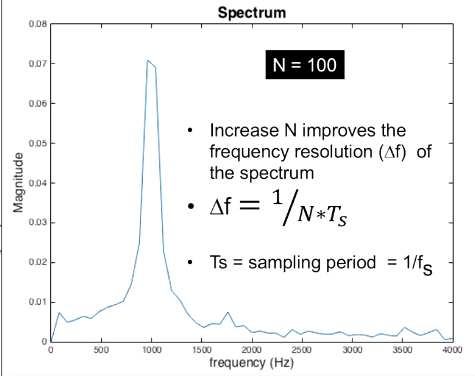

## Task 4 : Windowing effect of a signal

### Rectangular Window

In [2]:
%%file lab2task4.m
clear all;
ports = serialportlist;
pb = PyBench(ports(end));

% set sampling frequency
fs = 8000;
pb = pb.set_samp_freq(fs);

% Capture N samples
N = 1000;
samples = pb.get_mic(N);
data = samples - mean(samples); % remove DC offset

% plot data
figure(1);
clf
plot(data);
xlabel('Sample no');
ylabel('Signal Voltage (V)');
title('Microphone signal');

% find and plot the spectrum;
figure(2);
plot_spec_dB(data, fs)

% repeat capture and plot spectrum
while true
    samples = pb.get_mic(N);
    data = samples - mean(samples);
    figure(2)
    clf;
    plot_spec_dB(data,fs);
end

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task4.m'.


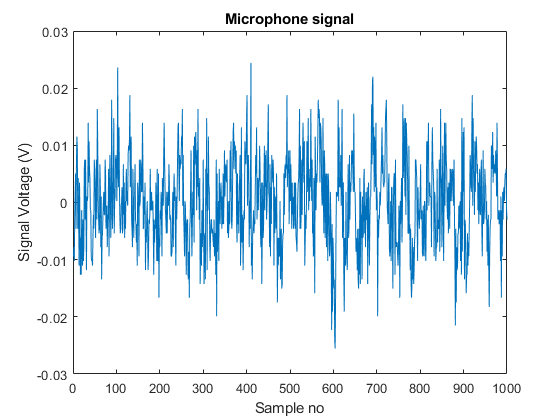

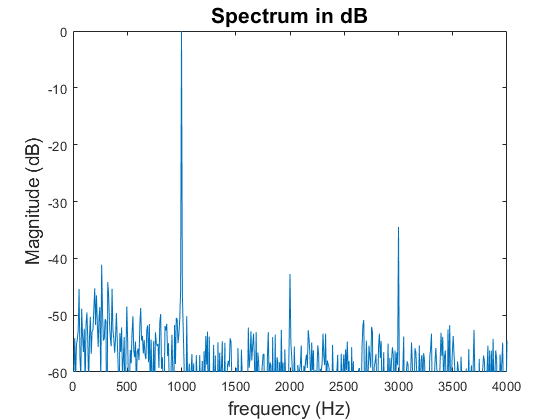

In [4]:
lab2task4

plot_spec_dB normalises the the frequency spectrum so that the maximum amplitude is 0. Therefore we can see now the other frequencies are much bigger on the dB graph because it is a logarithmic graph. On a linear scale, -40dB would be 100 times smaller hence would be barely visible on the graph. 

### The Windowing Effect
1000 Hz signal through a rectangular window

![1000 Hz signal through a rectangular window](1000window.png)

1100 Hz signal through a rectangular window

![1100Hz signal through a rectangular window](1100Window.png)

A 1000Hz signal sampled at 8kHz would have exactly 8 samples taken every cycle. For every 1000 samples (N=1000), that is exactly 125 cycles, therefore there is no discontinuity at the ends of what is effectively a rectangular window.

On the other hand, a 1100Hz signal sampled at 8kHz would have 7.27 samples every cycle and hence for every 1000 samples, that is 1000/7.27 = 137.6 cycles. This results in discontinuities at the ends of the rectangular window, causing spreading of energy to the neighbouring frequency components i.e. speactral leakage

### Hamming Window
The signal processing toolbox add-on for MATLAB had to be installed to make this code work

In [5]:
%%file lab2task4a.m
clear all;
ports = serialportlist;
pb = PyBench(ports(end));

% set sampling frequency
fs = 8000;
pb = pb.set_samp_freq(fs);

% Capture N samples
N = 1000;
samples = pb.get_mic(N);
data = samples - mean(samples); % remove DC offset

% plot data
figure(1);
clf
plot(data);
xlabel('Sample no');
ylabel('Signal Voltage (V)');
title('Microphone signal');

% find the spectrum;
figure(2);
plot_spec_dB(data, fs)

% create a hamming window
window = hamming(length(data));
while true
    samples = pb.get_mic(N);
    data = samples - mean(samples);
    clf;
    plot_spec_dB(data,fs);
    hold on
    plot_spec_dB(data.*window,fs);
end

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task4a.m'.


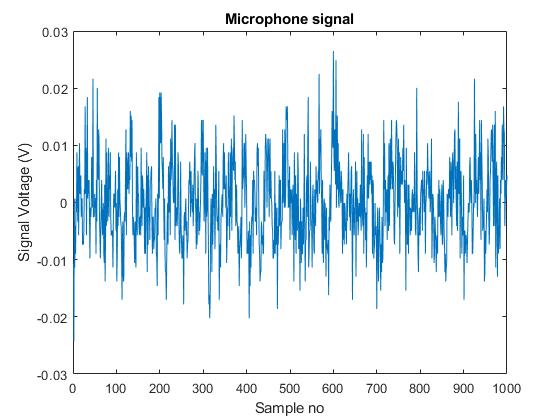

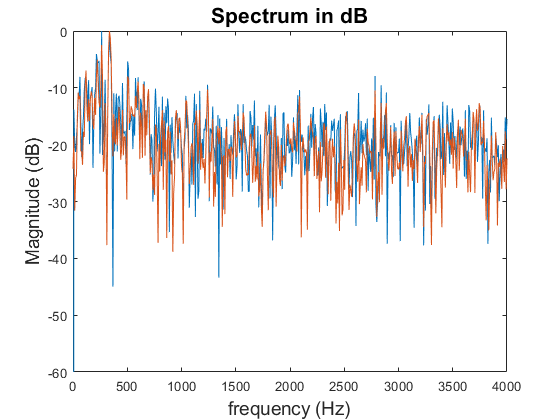

In [1]:
lab2task4a

1000Hz through a hamming window shown in orange

![](1000hamwindow.png)

1100Hz through a hamming window shown in orange

![](1100hamwindow.png)

The hamming window effectively removes discontinuities from the ends of the sampled block of signals, reducing spectral leakage significantly. The cost of this effect however is lost signal information.

## Task 5: Music Segmentation and Analysis
Analysing .wav music files

In [4]:
%%file lab2task5.m
clear all;
[sig fs] = audioread('two_drums.wav');
sound(sig,fs)

% plot the signal
figure(1);
clf;
plot(sig);
xlabel('Sample no');
ylabel('Signal (V)');
title('Two Drums');

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task5.m'.


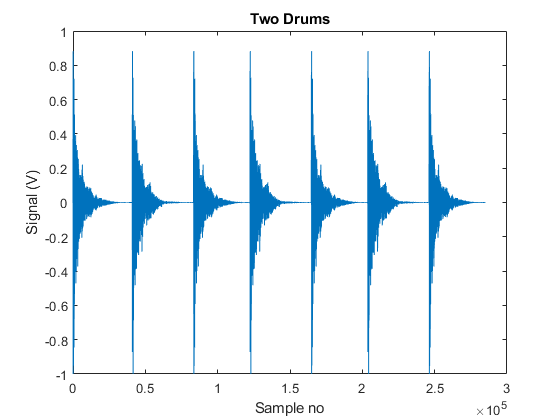

In [5]:
lab2task5

In [8]:
%%file lab2task5_signal_energy.m
clear all;
[sig fs] = audioread('two_drums.wav');
sound(sig,fs)

% plot the signal
figure(1);
clf;
plot(sig);
xlabel('Sample no');
ylabel('Signal (V)');
title('Two Drums');

% Divide signal into segments and find its energy
T = 0.02;
N = fs*T;
E = [];
for i=1:N:length(sig) - N + 1
    seg = sig(i:i + N - 1);
    E= [E seg'*seg];
end

% plot the energy graph and the peak values
figure(2);
clf;
x = 1:length(E);
plot(x, E)
xlabel('Segment number');
ylabel('Energy');
hold on

% find the local maxima
[pks locs] = findpeaks(E);
plot(locs,pks,'o');
hold off

%plot spectrum of energy
figure(3)
plot_spec(E - mean(E), 1/T);

Created file 'C:\Users\shenl\OneDrive - Imperial College London\Year 2\Electronics 2\LogBook-Electronics2\Lab_2\lab2task5_signal_energy.m'.


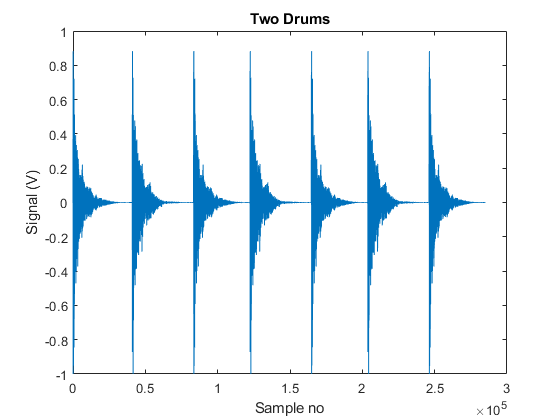

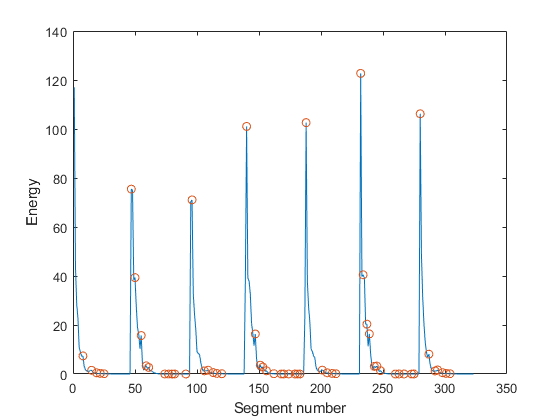

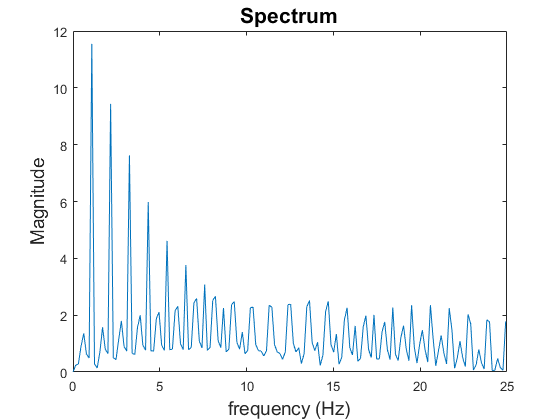

In [1]:
lab2task5_signal_energy

## Task 6: Analysing Complex Music
1. Extract features from guitar.wav and bass.wav e.g. beat, spectral information
2. Add the two signals together and analyse the combined signal

lab2task6.m doesn't work yet...

instead of adding the signals together what if we just play both at the same time????